## Work
1. 請改變 reduce_lr 的 patience 和 factor 並比較不同設定下，對訓練/驗證集的影響
2. 請將 optimizer 換成 Adam、RMSprop 搭配 reduce_lr 並比較訓練結果

In [1]:
import os
import keras
import itertools
# Disable GPU
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [36]:
#def build_mlp():
"""
Build your own model
"""
from keras.models import Sequential
from keras.layers import Dense
def build_mlp(input_shape,output_units=10,num_neurons=[512,128,64]):
    model=Sequential()
    model.add(Dense(units=input_shape[1], input_dim=input_shape[1],kernel_initializer='normal',activation='relu',name='input'))
    for i, n_units in enumerate(num_neurons):
        model.add(Dense(units=n_units,kernel_initializer='normal',activation='relu',name='hidden'+str(i+1)))
    model.add(Dense(units=output_units,kernel_initializer='normal',activation='softmax',name='output'))
    return model

In [37]:
# write function to built optimizer
def build_opt(opt):
    if opt =='SGD':
        return SGD(lr=LEARNING_RATE,nesterov=True, momentum=MOMENTUM)
    elif opt=='Adam':
        return Adam(lr=LEARNING_RATE,beta_1=0.9,beta_2=0.999,epsilon=None,decay=0.0,amsgrad=False)
    elif opt=='RMSprop':
        return RMSprop(lr=LEARNING_RATE,rho=0.9,epsilon=None,decay=0.0)

In [38]:
## 超參數設定
"""
Set your hyper-parameters
"""
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import SGD,Adam,RMSprop 

LEARNING_RATE=1e-3
EPOCHS=30
BATCH_SIZE=256
MOMENTUM=0.9
REDUCE_LR_PATIENCE=[5,8]
REDUCE_LR_FACTOR=[0.5,0.8]
OPTIMIZERS=['SGD','Adam','RMSprop']

### 作業一、改變 reduce_lr 的 patience 和 factor 並比較不同設定下，對訓練/驗證集的影響

In [40]:
# 載入 Callbacks
from keras.callbacks import ModelCheckpoint
"""
Set model checkpoint callbacks
Write your training loop and show the results
"""
results_D87_hw1={}
for p, f in itertools.product(REDUCE_LR_PATIENCE,REDUCE_LR_FACTOR):
    reduce_lr = ReduceLROnPlateau(factor=f, 
                                  min_lr=1e-12, 
                                  monitor='val_loss', 
                                  patience=p, 
                                  verbose=1)
    model = build_mlp(input_shape=x_train.shape)
    model.summary()
    optimizer = build_opt('SGD')
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[reduce_lr]
             )

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    #make dictionary for results
    exp_name_tag= f"[p={p}, f={f}]"
    results_D87_hw1[exp_name_tag]={'train_loss':train_loss,
                                   'valid_loss':valid_loss,
                                   'train_acc':train_acc,
                                   'valid_acc':valid_acc}

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 3072)              9440256   
_________________________________________________________________
hidden1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
hidden2 (Dense)              (None, 128)               65664     
_________________________________________________________________
hidden3 (Dense)              (None, 64)                8256      
_________________________________________________________________
output (Dense)               (None, 10)                650       
Total params: 11,088,202
Trainable params: 11,088,202
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [========

50000/50000 [==============================] - 45s 894us/step - loss: 1.5447 - acc: 0.4526 - val_loss: 1.5731 - val_acc: 0.4345
Epoch 13/30
50000/50000 [==============================] - 44s 889us/step - loss: 1.5232 - acc: 0.4611 - val_loss: 1.5574 - val_acc: 0.4354
Epoch 14/30
50000/50000 [==============================] - 44s 887us/step - loss: 1.5053 - acc: 0.4652 - val_loss: 1.5345 - val_acc: 0.4478
Epoch 15/30
50000/50000 [==============================] - 45s 892us/step - loss: 1.4840 - acc: 0.4735 - val_loss: 1.5693 - val_acc: 0.4427
Epoch 16/30
50000/50000 [==============================] - 44s 887us/step - loss: 1.4676 - acc: 0.4782 - val_loss: 1.5485 - val_acc: 0.4522
Epoch 17/30
50000/50000 [==============================] - 45s 892us/step - loss: 1.4496 - acc: 0.4848 - val_loss: 1.5318 - val_acc: 0.4535
Epoch 18/30
50000/50000 [==============================] - 44s 883us/step - loss: 1.4342 - acc: 0.4903 - val_loss: 1.4928 - val_acc: 0.4680
Epoch 19/30
50000/50000 [=======

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 45s 893us/step - loss: 2.1761 - acc: 0.2228 - val_loss: 2.0179 - val_acc: 0.2785
Epoch 2/30
50000/50000 [==============================] - 44s 882us/step - loss: 1.9262 - acc: 0.3136 - val_loss: 1.8618 - val_acc: 0.3365
Epoch 3/30
50000/50000 [==============================] - 44s 882us/step - loss: 1.8279 - acc: 0.3496 - val_loss: 1.8007 - val_acc: 0.3621
Epoch 4/30
50000/50000 [==============================] - 44s 883us/step - loss: 1.7715 - acc: 0.3687 - val_loss: 1.7573 - val_acc: 0.3752
Epoch 5/30
50000/50000 [==============================] - 45s 906us/step - loss: 1.7256 - acc: 0.3867 - val_loss: 1.7099 - val_acc: 0.3933
Epoch 6/30
50000/50000 [==============================] - 44s 883us/step - loss: 1.6866 - acc: 0.3976 - val_loss: 1.6801 - val_acc: 0.3976
Epoch 7/30
50000/50000 [==============================] - 45s 896us/step - loss: 1.6510 - acc: 0.4121 - val_loss: 1.

In [44]:
# write function to plot results
import matplotlib.pyplot as plt
%matplotlib inline
def plot_results(results):
    color_bar=['dodgerblue','greenyellow','red','sienna','lime','green','aqua','maroon','mediumblue','slateblue','darkorchid','purple']
    """
    Draw the results
    """
    plt.figure(figsize=(12,9))
    for i, cond in enumerate(results.keys()):
        plt.plot(range(len(results[cond]['train_loss'])), results[cond]['train_loss'], '-', label='train:'+cond, color=color_bar[i%12])
        plt.plot(range(len(results[cond]['valid_loss'])), results[cond]['valid_loss'],'--', label='valid:'+cond, color=color_bar[i%12])
    plt.title('Loss')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show

    plt.figure(figsize=(12,9))
    for i, cond in enumerate(results.keys()):
        plt.plot(range(len(results[cond]['train_acc'])), results[cond]['train_acc'], '-', label='train:'+cond, color=color_bar[i%12])
        plt.plot(range(len(results[cond]['valid_acc'])), results[cond]['valid_acc'],'--', label='valid:'+cond, color=color_bar[i%12])
    plt.title('Accuracy')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

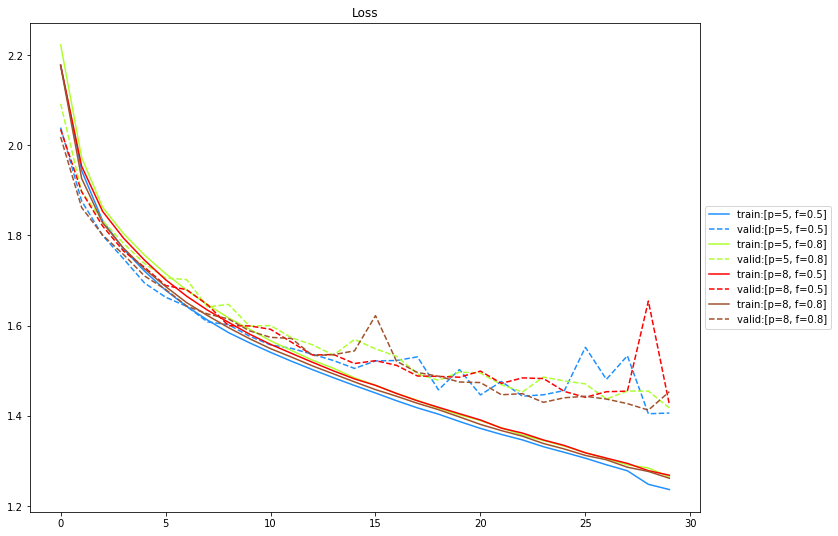

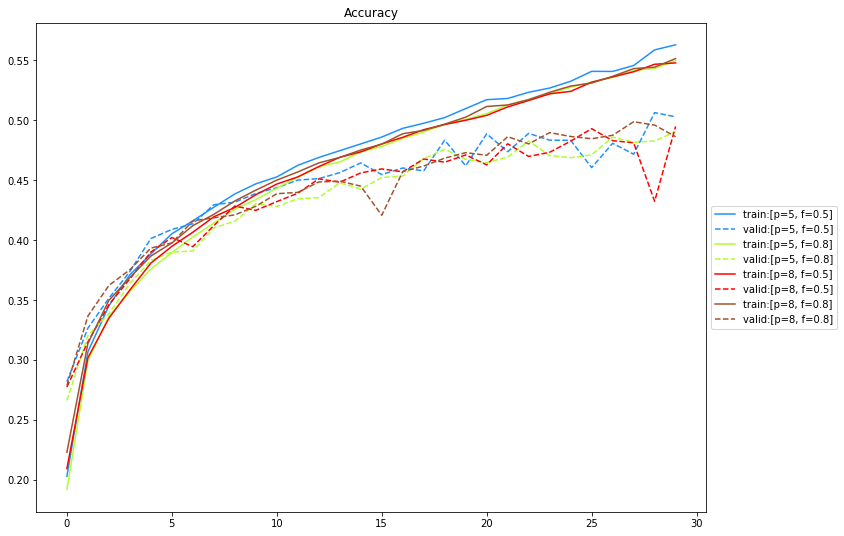

In [45]:
# 繪製結果
"""
plot the results
"""
plot_results(results_D87_hw1)

### 作業二、將 optimizer 換成 Adam、RMSprop 搭配 reduce_lr 並比較訓練結果

In [47]:
results_D87_hw2={}
for opt,p,f in itertools.product(OPTIMIZERS,REDUCE_LR_PATIENCE,REDUCE_LR_FACTOR):
    reduce_lr = ReduceLROnPlateau(factor=f, 
                                  min_lr=1e-12, 
                                  monitor='val_loss', 
                                  patience=p, 
                                  verbose=1)
    model = build_mlp(input_shape=x_train.shape)
    model.summary()
    optimizer = build_opt(opt)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[reduce_lr]
             )

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    #make dictionary for results
    exp_name_tag= f"{opt}[p={p}, f={f}]"
    results_D87_hw2[exp_name_tag]={'train_loss':train_loss,
                                   'valid_loss':valid_loss,
                                   'train_acc':train_acc,
                                   'valid_acc':valid_acc}

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 3072)              9440256   
_________________________________________________________________
hidden1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
hidden2 (Dense)              (None, 128)               65664     
_________________________________________________________________
hidden3 (Dense)              (None, 64)                8256      
_________________________________________________________________
output (Dense)               (None, 10)                650       
Total params: 11,088,202
Trainable params: 11,088,202
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 36s 729us/step - loss:

50000/50000 [==============================] - 44s 888us/step - loss: 1.5015 - acc: 0.4668 - val_loss: 1.5666 - val_acc: 0.4369
Epoch 15/30
50000/50000 [==============================] - 44s 884us/step - loss: 1.4851 - acc: 0.4720 - val_loss: 1.5255 - val_acc: 0.4506
Epoch 16/30
50000/50000 [==============================] - 44s 881us/step - loss: 1.4688 - acc: 0.4780 - val_loss: 1.5330 - val_acc: 0.4505
Epoch 17/30
50000/50000 [==============================] - 44s 888us/step - loss: 1.4516 - acc: 0.4835 - val_loss: 1.5424 - val_acc: 0.4538
Epoch 18/30
50000/50000 [==============================] - 44s 889us/step - loss: 1.4347 - acc: 0.4909 - val_loss: 1.5039 - val_acc: 0.4605
Epoch 19/30
50000/50000 [==============================] - 44s 888us/step - loss: 1.4220 - acc: 0.4938 - val_loss: 1.5149 - val_acc: 0.4626
Epoch 20/30
50000/50000 [==============================] - 44s 882us/step - loss: 1.4069 - acc: 0.5002 - val_loss: 1.4952 - val_acc: 0.4637
Epoch 21/30
50000/50000 [=======

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 46s 910us/step - loss: 2.2183 - acc: 0.2024 - val_loss: 2.0785 - val_acc: 0.2714
Epoch 2/30
50000/50000 [==============================] - 44s 888us/step - loss: 1.9795 - acc: 0.2910 - val_loss: 1.9109 - val_acc: 0.3186
Epoch 3/30
50000/50000 [==============================] - 44s 887us/step - loss: 1.8729 - acc: 0.3282 - val_loss: 1.8410 - val_acc: 0.3409
Epoch 4/30
50000/50000 [==============================] - 44s 886us/step - loss: 1.8105 - acc: 0.3538 - val_loss: 1.7814 - val_acc: 0.3706
Epoch 5/30
50000/50000 [==============================] - 45s 891us/step - loss: 1.7551 - acc: 0.3751 - val_loss: 1.7256 - val_acc: 0.3859
Epoch 6/30
50000/50000 [==============================] - 44s 885us/step - loss: 1.7107 - acc: 0.3919 - val_loss: 1.6993 - val_acc: 0.3893
Epoch 7/30
50000/50000 [==============================] - 44s 885us/step - loss: 1.6737 - acc: 0.4037 - val_loss: 1.

50000/50000 [==============================] - 64s 1ms/step - loss: 0.9168 - acc: 0.6725 - val_loss: 1.3250 - val_acc: 0.5517
Epoch 23/30
50000/50000 [==============================] - 64s 1ms/step - loss: 0.8800 - acc: 0.6872 - val_loss: 1.3521 - val_acc: 0.5517
Epoch 24/30
50000/50000 [==============================] - 64s 1ms/step - loss: 0.8548 - acc: 0.6958 - val_loss: 1.4104 - val_acc: 0.5428
Epoch 25/30
50000/50000 [==============================] - 64s 1ms/step - loss: 0.8317 - acc: 0.7051 - val_loss: 1.3766 - val_acc: 0.5493
Epoch 26/30
50000/50000 [==============================] - 64s 1ms/step - loss: 0.8133 - acc: 0.7100 - val_loss: 1.4216 - val_acc: 0.5385

Epoch 00026: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 27/30
50000/50000 [==============================] - 64s 1ms/step - loss: 0.7322 - acc: 0.7428 - val_loss: 1.4159 - val_acc: 0.5545
Epoch 28/30
50000/50000 [==============================] - 64s 1ms/step - loss: 0.7015 - acc: 0.7551 - 

Epoch 4/30
50000/50000 [==============================] - 63s 1ms/step - loss: 1.5502 - acc: 0.4461 - val_loss: 1.6681 - val_acc: 0.4205
Epoch 5/30
50000/50000 [==============================] - 63s 1ms/step - loss: 1.5031 - acc: 0.4640 - val_loss: 1.4818 - val_acc: 0.4737
Epoch 6/30
50000/50000 [==============================] - 63s 1ms/step - loss: 1.4446 - acc: 0.4844 - val_loss: 1.4890 - val_acc: 0.4684
Epoch 7/30
50000/50000 [==============================] - 64s 1ms/step - loss: 1.4179 - acc: 0.4934 - val_loss: 1.4584 - val_acc: 0.4779
Epoch 8/30
50000/50000 [==============================] - 64s 1ms/step - loss: 1.3764 - acc: 0.5085 - val_loss: 1.4333 - val_acc: 0.4867
Epoch 9/30
50000/50000 [==============================] - 64s 1ms/step - loss: 1.3479 - acc: 0.5188 - val_loss: 1.5236 - val_acc: 0.4556
Epoch 10/30
50000/50000 [==============================] - 64s 1ms/step - loss: 1.3034 - acc: 0.5374 - val_loss: 1.3994 - val_acc: 0.5044
Epoch 11/30
50000/50000 [===============

50000/50000 [==============================] - 62s 1ms/step - loss: 0.9452 - acc: 0.6629 - val_loss: 1.3999 - val_acc: 0.5356
Epoch 25/30
50000/50000 [==============================] - 63s 1ms/step - loss: 0.9304 - acc: 0.6667 - val_loss: 1.4238 - val_acc: 0.5333

Epoch 00025: ReduceLROnPlateau reducing learning rate to 0.000800000037997961.
Epoch 26/30
50000/50000 [==============================] - 63s 1ms/step - loss: 0.8667 - acc: 0.6912 - val_loss: 1.4457 - val_acc: 0.5373
Epoch 27/30
50000/50000 [==============================] - 62s 1ms/step - loss: 0.8396 - acc: 0.7008 - val_loss: 1.4286 - val_acc: 0.5401
Epoch 28/30
50000/50000 [==============================] - 63s 1ms/step - loss: 0.8075 - acc: 0.7117 - val_loss: 1.4678 - val_acc: 0.5382
Epoch 29/30
50000/50000 [==============================] - 63s 1ms/step - loss: 0.7871 - acc: 0.7199 - val_loss: 1.4886 - val_acc: 0.5326
Epoch 30/30
50000/50000 [==============================] - 63s 1ms/step - loss: 0.7557 - acc: 0.7297 - v

Epoch 6/30
50000/50000 [==============================] - 54s 1ms/step - loss: 1.6503 - acc: 0.4092 - val_loss: 1.6247 - val_acc: 0.4209
Epoch 7/30
50000/50000 [==============================] - 55s 1ms/step - loss: 1.6066 - acc: 0.4263 - val_loss: 1.7182 - val_acc: 0.4001
Epoch 8/30
50000/50000 [==============================] - 54s 1ms/step - loss: 1.5638 - acc: 0.4400 - val_loss: 1.7627 - val_acc: 0.3857
Epoch 9/30
50000/50000 [==============================] - 55s 1ms/step - loss: 1.5319 - acc: 0.4541 - val_loss: 1.5127 - val_acc: 0.4610
Epoch 10/30
50000/50000 [==============================] - 55s 1ms/step - loss: 1.4970 - acc: 0.4671 - val_loss: 1.5729 - val_acc: 0.4432
Epoch 11/30
50000/50000 [==============================] - 55s 1ms/step - loss: 1.4604 - acc: 0.4768 - val_loss: 1.5525 - val_acc: 0.4554
Epoch 12/30
50000/50000 [==============================] - 55s 1ms/step - loss: 1.4271 - acc: 0.4910 - val_loss: 1.5680 - val_acc: 0.4607
Epoch 13/30
50000/50000 [=============

50000/50000 [==============================] - 55s 1ms/step - loss: 0.8531 - acc: 0.6895 - val_loss: 1.8388 - val_acc: 0.5022
Epoch 27/30
50000/50000 [==============================] - 55s 1ms/step - loss: 0.8204 - acc: 0.7021 - val_loss: 1.5693 - val_acc: 0.5318
Epoch 28/30
50000/50000 [==============================] - 54s 1ms/step - loss: 0.7902 - acc: 0.7127 - val_loss: 1.6670 - val_acc: 0.5184
Epoch 29/30
50000/50000 [==============================] - 55s 1ms/step - loss: 0.7567 - acc: 0.7238 - val_loss: 1.7203 - val_acc: 0.5181
Epoch 30/30
50000/50000 [==============================] - 54s 1ms/step - loss: 0.7308 - acc: 0.7329 - val_loss: 1.7939 - val_acc: 0.5250
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 3072)              9440256   
_________________________________________________________________
hidden1 (Dense)              (None, 512)               157

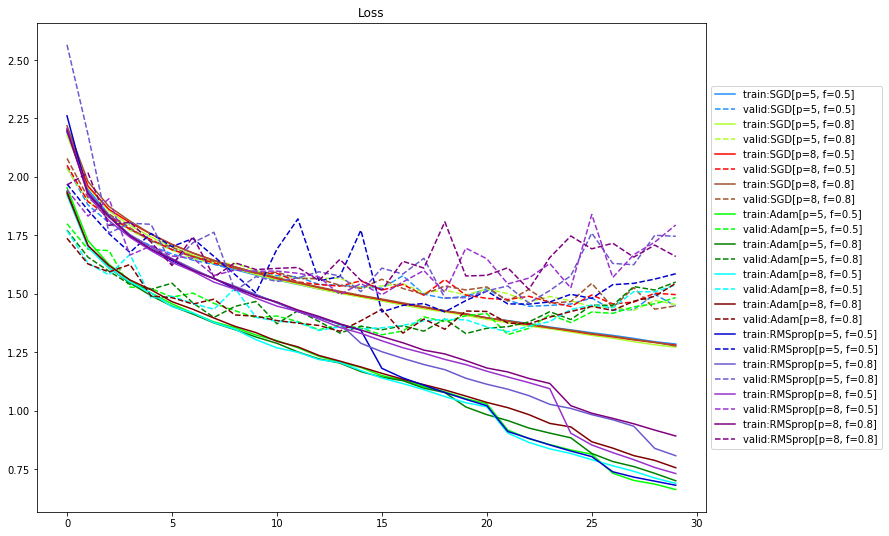

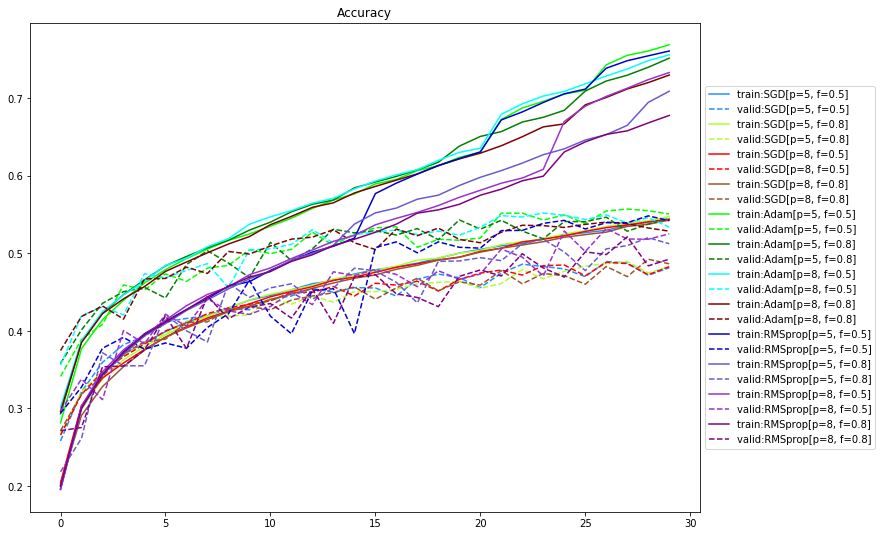

In [48]:
plot_results(results_D87_hw2)